# 2110443 - Computer Vision (2022/2)
## Lab 11 - Dynamic Vision
In this lab, we will learn to describe image motion from images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## 1. Background Subtraction
This tutorial was originally from [here](https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html)

- Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.
- As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.



<img src="https://docs.opencv.org/3.4/Background_Subtraction_Tutorial_Scheme.png" />

A [cv2.VideoCapture](https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html) object is used to read the input video or input images sequence.

In [2]:
capture = cv2.VideoCapture('assets/vtest.avi')

A [cv2.BackgroundSubtractor](https://docs.opencv.org/3.4/d7/df6/classcv_1_1BackgroundSubtractor.html) object will be used to generate the foreground mask. In this example, default parameters are used, but it is also possible to declare specific parameters in the create function.

We use MOG background subtractor for this example.

It uses a method to model each background pixel by a mixture of K Gaussian distributions (K = 3 to 5). The weights of the mixture represent the time proportions that those colours stay in the scene. The probable background colours are the ones which stay longer and more static.

<img src="https://miro.medium.com/max/1400/0*1EkPhFtPTRgmHumI.png" />

In [3]:
backSub = cv2.bgsegm.createBackgroundSubtractorMOG()

Every frame is used both for calculating the foreground mask and for updating the background. If you want to change the learning rate used for updating the background model, it is possible to set a specific learning rate by passing a parameter to the apply method.

You can read more about "apply" function by clicking [here](https://docs.opencv.org/3.4/d7/df6/classcv_1_1BackgroundSubtractor.html#aa735e76f7069b3fa9c3f32395f9ccd21)

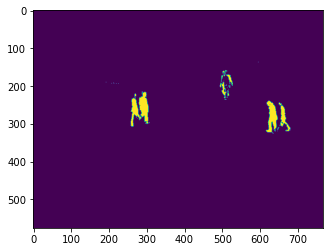

In [7]:
ret, frame = capture.read()
fgMask = backSub.apply(frame)
plt.imshow(fgMask)
plt.show()

Show the result!

In [16]:
capture = cv2.VideoCapture('assets/vtest.avi')
backSub = cv2.bgsegm.createBackgroundSubtractorMOG()
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    fgMask = backSub.apply(frame)
    
    
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv2.imshow('Frame', frame)
    cv2.imshow('KNN Mask', fgMask)
    
    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

There are other background subtraction algorithms as shown in the image below.

<img src="https://docs.opencv.org/3.4/d7/df6/classcv_1_1BackgroundSubtractor.png"></img>

In the next block, we compare 4 background subtraction algorithms.

In [22]:
capture = cv2.VideoCapture('assets/vtest.avi')


backSubKNN = cv2.createBackgroundSubtractorKNN()
backSubMOG2 = cv2.createBackgroundSubtractorMOG2()
backSubMOG = cv2.bgsegm.createBackgroundSubtractorMOG()
backSubGMG = cv2.bgsegm.createBackgroundSubtractorGMG()


while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    frame = cv2.resize(frame, (400, 300)) 
    
    fgMaskKNN = backSubKNN.apply(frame)
    fgMaskMOG = backSubMOG.apply(frame)
    fgMaskMOG2 = backSubMOG2.apply(frame)
    fgMaskGMG = backSubGMG.apply(frame)
    
    
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    original =  cv2.imshow('Frame', frame)
    
    
    cv2.imshow('KNN Mask', fgMaskKNN)
    cv2.imshow('MOG Mask', fgMaskMOG)
    cv2.imshow('MOG2 Mask', fgMaskMOG2)
    cv2.imshow('GMG Mask', fgMaskGMG)
    
    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

KeyboardInterrupt: 

## 2. Optical Flow in OpenCV
This tutorial was originally from [here](https://docs.opencv.org/3.4/d4/dee/tutorial_optical_flow.html)

Optical flow is the pattern of apparent motion of image objects between two consecutive frames caused by the movement of object or camera. It is 2D vector field where each vector is a displacement vector showing the movement of points from first frame to second. Consider the image below (Image Courtesy: [Wikipedia article on Optical Flow](https://en.wikipedia.org/wiki/Optical_flow)).

<img src='https://docs.opencv.org/3.4/optical_flow_basic1.jpg'/>
image
It shows a ball moving in 5 consecutive frames. The arrow shows its displacement vector. 



Optical flow works on several assumptions:
- The pixel intensities of an object do not change between consecutive frames.
- Neighbouring pixels have similar motion.

### Lucas-Kanade Optical Flow 

We have seen an assumption before, that all the neighbouring pixels will have similar motion. Lucas-Kanade method takes a 3x3 patch around the point. So all the 9 points have the same motion.

So from the user point of view, the idea is simple, we give some points to track, we receive the optical flow vectors of those points. But again there are some problems. Until now, we were dealing with small motions, so it fails when there is a large motion. To deal with this we use pyramids. When we go up in the pyramid, small motions are removed and large motions become small motions. So by applying Lucas-Kanade there, we get optical flow along with the scale.


You can see the video below for more detail.

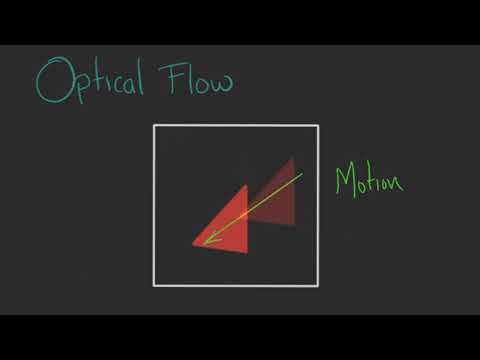

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="yFX_N5p0kO0")

To decide the points to detect optical flow, we use [cv2.goodFeaturesToTrack()](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541). We take the first frame, detect some Shi-Tomasi corner points in it

In [22]:
cap = cv2.VideoCapture('assets/slow_traffic_small.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

Then, we iteratively track those points using Lucas-Kanade optical flow. For the function [cv2.calcOpticalFlowPyrLK()](https://docs.opencv.org/3.4/dc/d6b/group__video__track.html#ga473e4b886d0bcc6b65831eb88ed93323) we pass the previous frame, previous points and next frame. It returns next points along with some status numbers which has a value of 1 if next point is found, else zero. We iteratively pass these next points as previous points in next step.

In [23]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0, 255, (100, 3))

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv2.add(frame, mask)
    cv2.imshow('frame', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
cv2.destroyAllWindows()

No frames grabbed!


#### Dense Optical Flow

Lucas-Kanade method computes optical flow for a sparse feature set (in our example, corners detected using Shi-Tomasi algorithm). OpenCV provides another algorithm to find the dense optical flow. It computes the optical flow for all the points in the frame. It is based on Gunnar Farneback's algorithm which is explained in "Two-Frame Motion Estimation Based on Polynomial Expansion" by Gunnar Farneback in 2003.

Below sample shows how to find the dense optical flow using above algorithm. We get a 2-channel array with optical flow vectors, (u,v). We find their magnitude and direction. We color code the result for better visualization. Direction corresponds to Hue value of the image. Magnitude corresponds to Value plane.

In [ ]:

cap = cv2.VideoCapture("assets/vtest.avi")
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
while(1):
    ret, frame2 = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    cv2.imshow('Frame', frame2)
    cv2.imshow('frame2', bgr)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
   
    prvs = next
cv2.destroyAllWindows()